Visualization

In [ ]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#uploading the file to google colab
from google.colab import files
uploaded = files.upload()


Saving Iris.csv to Iris.csv


In [ ]:
#reading the file using pandas and storing it in the dataframe
dataset = pd.read_csv('Iris.csv')

In [ ]:
dataset.shape

(150, 6)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
print(dataset)

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]


In [ ]:
#grouping them on the basis of species and viewing the number of rows in each rows
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
#dividing the data into features and labels
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

X = dataset[feature_columns].values
y = dataset['Species'].values

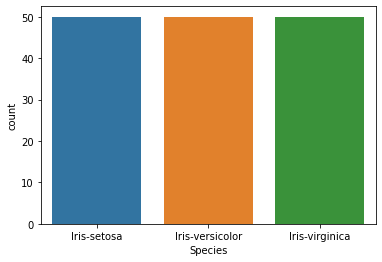

In [ ]:
sns.countplot(x="Species", data = dataset)
plt.show()

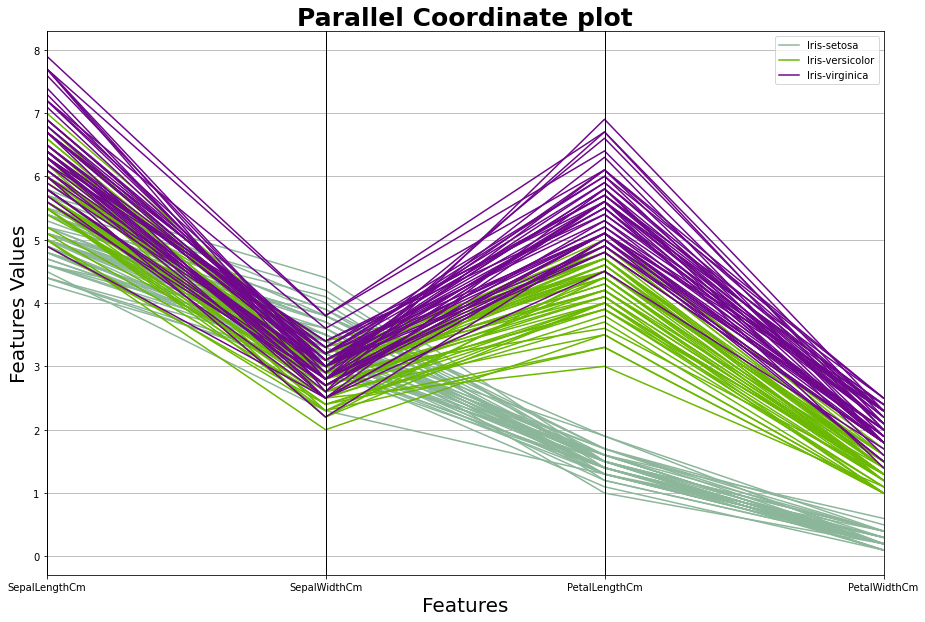

In [ ]:
#parallel coordinates : this is a plotting technique for plotting multivariate data. It allows us to see the clusters

from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
plt.title("Parallel Coordinate plot", fontSize = 25, fontWeight = 'bold')
parallel_coordinates(dataset.drop("Id", axis=1), "Species")
plt.xlabel("Features", fontSize= 20)
plt.ylabel("Features Values", fontSize= 20)
plt.legend()
plt.show()

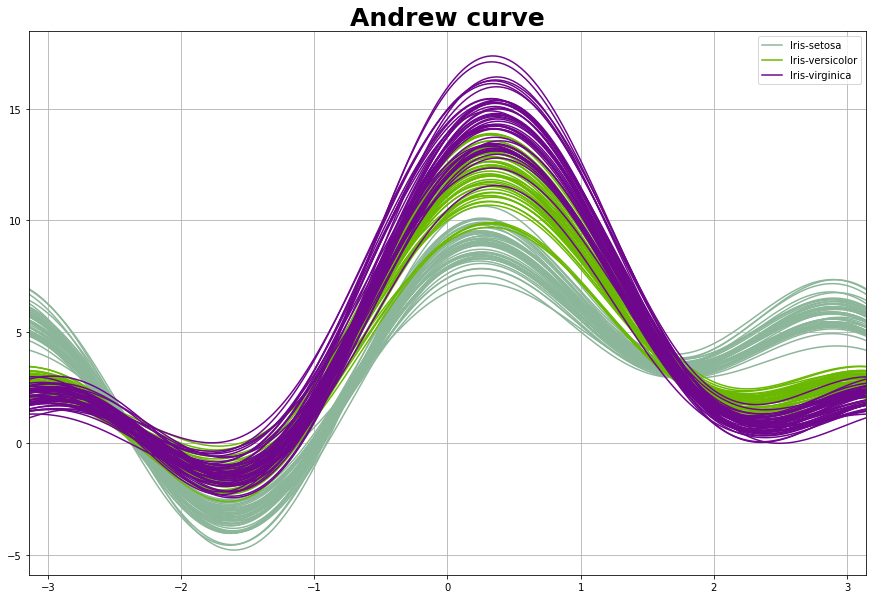

In [ ]:
from IPython.core.pylabtools import figsize
#andrews curves
from pandas.plotting import andrews_curves
plt.figure(figsize(15,10))
plt.title("Andrew curve",fontSize = 25, fontWeight = 'bold')
andrews_curves(dataset.drop("Id", axis=1), "Species")
plt.legend()
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x720 with 0 Axes>

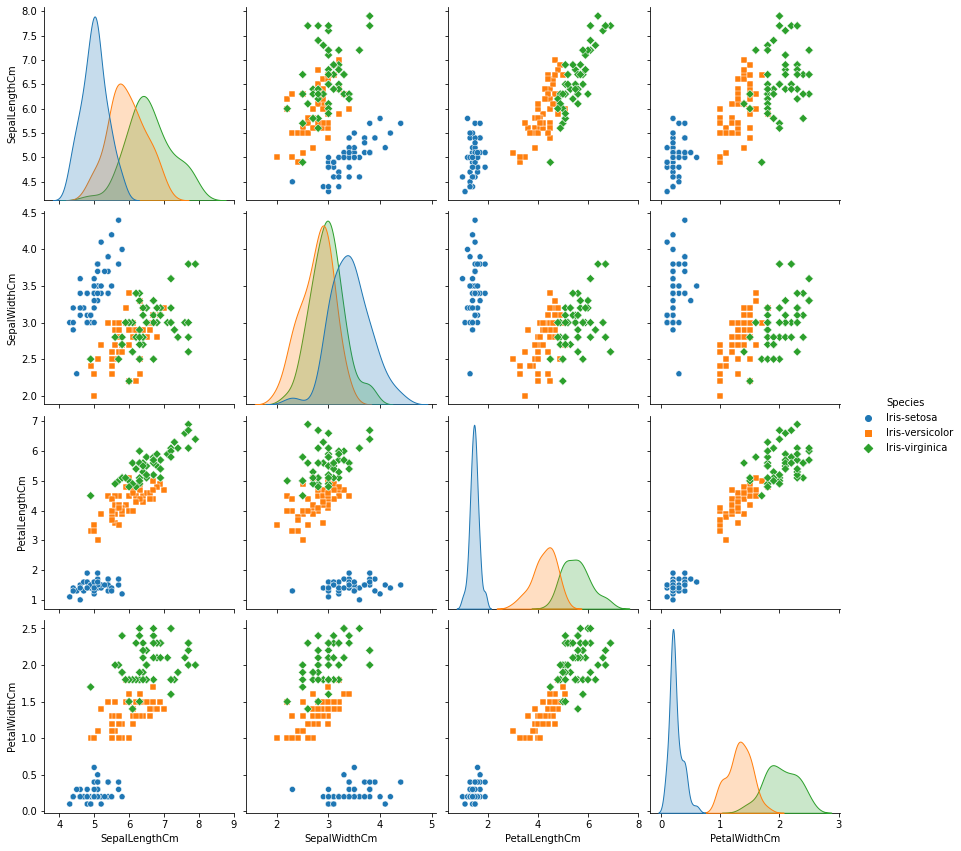

In [ ]:
#pairplot : to plot the relationship between mulpiple variables seperately within subsets of our dataset
plt.figure()
sns.pairplot(dataset.drop("Id", axis=1), hue = 'Species', size = 3, markers = ['o', 's', 'D'])
plt.show()

<Figure size 1080x720 with 0 Axes>

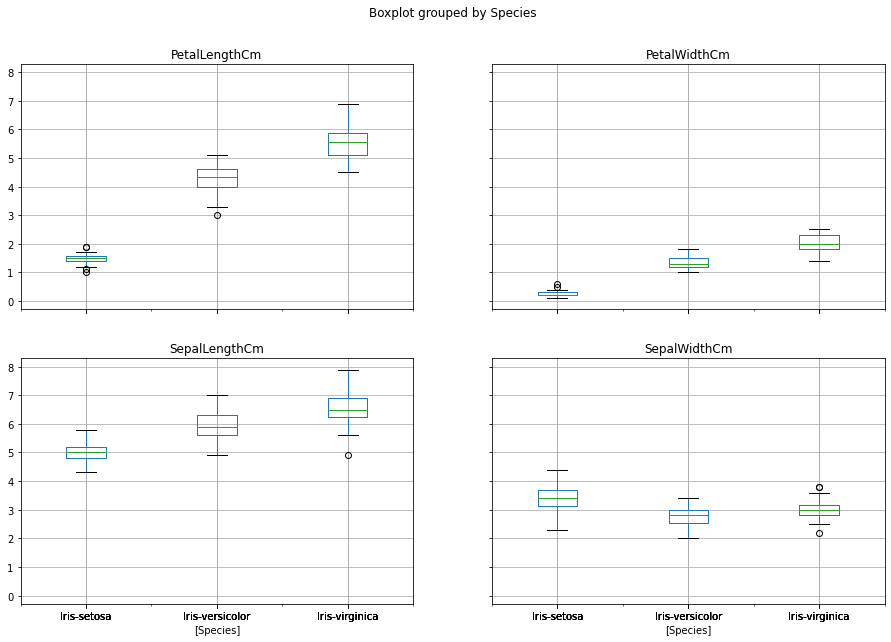

In [ ]:
#boxplots
plt.figure()
dataset.drop("Id", axis=1).boxplot(by="Species", figsize=(15,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice.
  
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


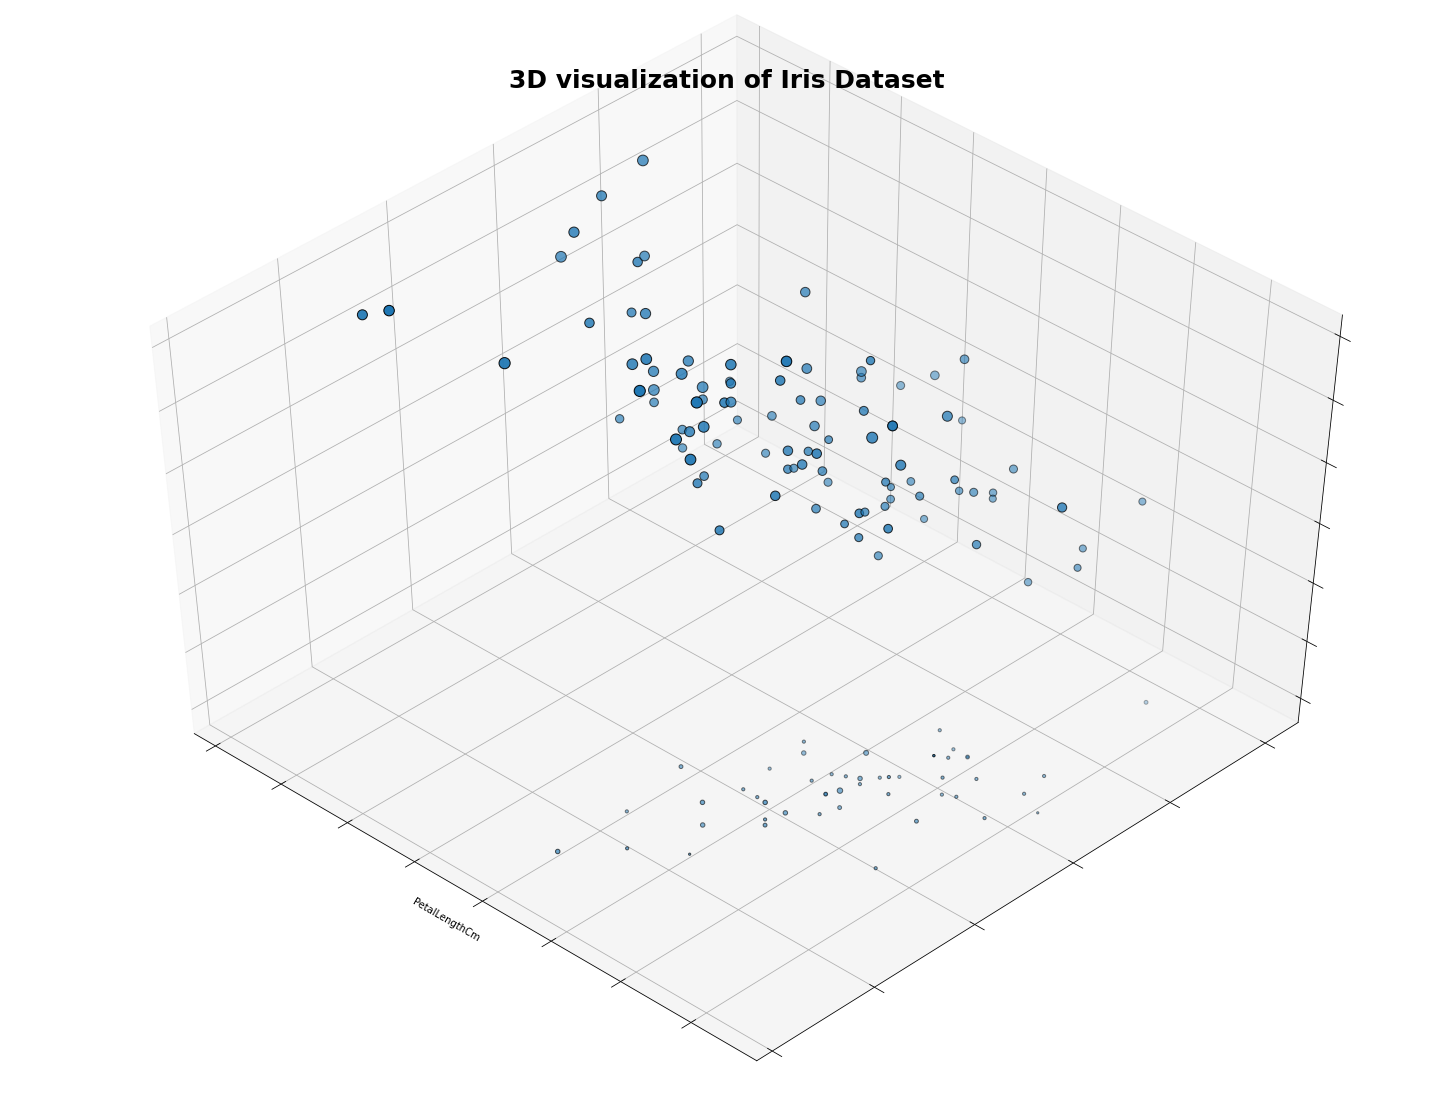

In [ ]:
#3d visualization

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(20,15))
ax = Axes3D(fig, elev=48, azim=134)

ax.scatter(X[:,0], X[:, 1], X[ :, 2],
           cmap = plt.cm.Set1, edgecolor='k', s = X[:,3]*50)

for name,label in [('Virginica', 0), ('Setosa', 1), ('Versicolor', 2)]:
  ax.text3D(X[y==label , 0].mean(),
            X[y==label , 1].mean(),
            X[y==label , 2].mean(), name,
            horizontalalignment='center',
            bbox=dict(alpha=0.7, edgecolor='w', facecolor='w'), size=20
            )


ax.set_title("3D visualization of Iris Dataset", fontsize=25, fontweight = 'bold')
ax.set_xlabel("SepalLengthCm ")
ax.w_xaxis.set_ticklabels([])
ax.set_xlabel("SepalWidthCm ")
ax.w_yaxis.set_ticklabels([])
ax.set_xlabel("PetalLengthCm ")
ax.w_zaxis.set_ticklabels([])

plt.show()

KNN classification

In [ ]:
#fitting the classifier to our Training datast

#importing all the libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
#create an obj or we will instantiate the model for 3 neighbours

classifier = KNeighborsClassifier(n_neighbors=3)

In [ ]:
#splitting the data : 20% testing and 80% training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#fit the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#predict the results
y_pred = classifier.predict(X_test)

In [ ]:
# evaluate the predictions or the accuracy

cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [ ]:
#calculate the accuracy

accuracy = accuracy_score(y_test, y_pred)*100
print("The accuracy of our model is : " , accuracy , " % ")

The accuracy of our model is :  96.66666666666667  % 
